## Lecture 2: Object-oriented programming and data analysis packages

### MIT Practical Computing Tutorials for Earth Scientists
<hr>

### Review: Python functions (~5 minutes)

Recall from Lecture 1: Introduction to programming that a function is a block of code which only executes when it is called, not when it is defined. You can pass input data, which are separated by commas and known as arguments, into a function. Functions often calculate the value of some variable based on the input arguments and return a variable as the main result.

Example: a simple function which takes two `string`-type arguments, a first and last name, as inputs and outputs the full name as a single string.

In [1]:
# Function definition
def print_name(first_name, last_name):
    name = first_name + " " + last_name
    return name
  
# Main program
result = print_name("Margaret", "Hamilton") # Function call

print(result)

Margaret Hamilton


Note: variables defined inside of functions are not accessible outside of the function, even if the function has been called!

In [2]:
name

NameError: name 'name' is not defined

Functions can also be written to carry out various internal operations but not return anything, which in Python is represented by returning `None`, which has type `NoneType`.

In [3]:
# Function definition
def print_name2(first_name, last_name):
    print(first_name + " " + last_name)
    return
  
# Main program
result = print_name2("Margaret", "Hamilton") # Function call
print(result)
print(type(result))

Margaret Hamilton
None
<class 'NoneType'>


Functions help simplify otherwise complicated calculations that may consist of many individual operations, variables, and parameters.

##### Example: a function for calculating the roots of a quadratic equation based on the quadratic formula
It is much more efficient to create a function to calculate the roots of a quadratic equation
\begin{equation}
a x^{2} + bx + c = 0
\end{equation}

than to explicitly write out the quadratic formula
\begin{equation}
x = \frac{b \; \pm \sqrt{b^{2} - 4ac}}{2a}
\end{equation}
every time we need to use it. Writing function also reduces the likelihood that of a typo or *bug*, since only the function itself needs to be proofread once, not every single time we wish to perform the operation.



In [4]:
def quadratic_roots(a, b, c):
    x1 = (-b + (b**2 - 4. *a*c)**0.5)/(2*a)
    x2 = (-b - (b**2 - 4. *a*c)**0.5)/(2*a)
    return x1, x2 # we can return more than one variable

a, b, c = 1., 2., -3. # example coefficients
x1, x2 = quadratic_roots(a, b, c) # the function returns both variables: x1 and x2

# We can use boolean logic to verify that the calculated values are indeed roots of the quadratic equation
print('Verification: ')
print(a * x1**2 + b * x1 + c == 0.)
print(a * x2**2 + b * x2 + c == 0.)

# And verify that some arbitrary guess is not a root
xguess = 1.2345
print('\nGuess: ') # '\n' is the "newline" character
print(a * xguess**2 + b * xguess + c == 0.)

Verification: 
True
True

Guess: 
False


A Function is a useful and efficient way of bundling code that does one specific task. When the task at hand requires many different functions operating on a wide variety of different variables or variable types, it is often useful to use a more abstract kind of data structure than a function: a user-defined object.

### Python Objects (~35 minutes)

#### Python `class`

A `class` is essentially a blueprint for creating new kinds of Python objects (see more [here](https://www.w3schools.com/python/python_classes.asp)).

The following is a very simple example of a Python class, as applied to the example of an object that represents a quadratic function
\begin{equation}
y = ax^{2} + bx + c.
\end{equation}

A quadratic equation is uniquely defined by its three coefficients $a$, $b$, and $c$ and thus we define a basic `quadratic()` class based on assigned values for these three coefficients.


In [5]:
class quadratic():
    a = 1.
    b = 2.
    c = -3.


As was the case with functions, defining a function does not yet run any of its code: you need to call the class for it to execute. Here, we assign the variable `q` with this particular instance of the object defined by the class `quadratic`, which we call by appending the class with `()`.

In [6]:
q = quadratic()

print("The definition of the class itself: ")
print(quadratic)
print("\nOne particular instance `q` of the object defined by the class: ")
print(q)

The definition of the class itself: 
<class '__main__.quadratic'>

One particular instance `q` of the object defined by the class: 


We can access the variables defined inside of our instance of `q` with the `.` operator:

In [7]:
print(q.a)

1.0


Once we create an instance of the object, we can also modify it's values

In [8]:
q.a = 2.
print(q.a)

2.0


##### Exercise: using variables within an object instance
1. Use the coefficients contained in the class above to evaluate the quadratic function
\begin{equation}
y(x) = x^{2} + 2x - 3
\end{equation}
at $x=5$ and print its value.

In [9]:
### Type your solution below:
q = quadratic()
x = 5.

#### Python `method`

A Python `method` is essentially a `function` that is attached to a specific `class` and lives entirely within that class.

A class' method always has the class itself as it's first argument: typically the keyword `self` is used to clarify that the method acts on the class it*self*. By passing `self` as an argument, the method can call upon any variables (or other methods) defined within the class.

For example, we can include a method `evaluate(self, x)` to our `quadratic` class which evaluates the value of $y = a x^{2} + bx + c$ at a given $x$.

In [10]:
class quadratic():
    a = 1.
    b = 2.
    c = -3.
    
    def evaluate(self, x):
        return self.a * x**2 + self.b * x + self.c

A method is called with the syntax:

```python
[class_name].[method_named]([object_instance], [other method arguments])
```

In [11]:
q = quadratic()
x = 0.
y = quadratic.evaluate(q, x) # calling a method
print(y)

-3.0


Here, `quadratic` is the class while `q` is merely one instance of the object defined by the class.

By calling the method on a specific instance of a class, the method recognizes the instance as `self` and the first argument of the method can be omitted:

In [12]:
y = q.evaluate(x) # concise way of calling a method
print(y)

-3.0


The class we have defined so far is not very flexible: every time we call the class to create and object instance the values of `a`, `b`, and `c` will be exactly the same, since their numeric values were directly assigned ("hard-coded") within the class definition.

We can use the `__init__()` method, which is the standard way to pass arguments to initialize methods:

In [13]:
class quadratic():
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def evaluate(self, x):
        return self.a * x**2 + self.b * x + self.c
    
q = quadratic(3., 2., -5.) # now we can assign different coefficients upon creation of the object instance

x = -2.
y = q.evaluate(x)
print(y)

3.0


##### Exercise: add a method to a class

Add a method `calc_roots`, which returns the two roots of a quadratic equation, to the `quadratic` class. Create a few different instances of quadratic equations and print their roots. What data type are the roots of the equation $y(x) = x^{2} + x + 1$?

In [14]:
# Hint: modify the quadratic_roots(a, b, c) function above to make it a method

class quadratic():
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def evaluate(self, x):
        return self.a * x**2 + self.b * x + self.c
    
    def calc_roots(self):
        pass # Replace pass with code to return the roots of the quadratic


#### Python `method` inheritance

It is common to have two classes which may share variables or methods in common. A "child" class can inherit the variables and methods of a "parent" class by defining it with the syntax
```python
class [child_class_name]([parent_class_name]):
```

Consider for example that we would like to create a class describing a parabola
\begin{equation}
y = a x^{2} + c
\end{equation}
which is a specific case of a quadratic equation for which $b=0$.

Rather than copy-pasting the methods of the `quadratic` class to create a new class from scratch, we can simply tell our new `parabola` class to inherent the properties of the parent class `quadratic` and make any additional modifications which differentiate a parabola from a quadratic.

In [15]:
class quadratic():
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def evaluate(self, x):
        return self.a * x**2 + self.b * x + self.c

class parabola(quadratic): # inherit from quadratic
    def __init__(self, a, c): # b = 0 by definition so we do not need it as an input
        self.a = a
        self.b = 0.
        self.c = c

print('Verify that `quadratic` and `parabola` give the same results when b=0:', end=' ')

x = 0.
q = quadratic(1., 0, -1.)
p = parabola(1., -1.)
print(p.evaluate(x) == q.evaluate(x)) # Note that parabola has inherited the evaluate(self, x) method!

Verify that `quadratic` and `parabola` give the same results when b=0: True


#### Python `module` and `import`

Our current method of defining classes and functions requires us (and any collaborators!) to copy and paste the class or function definitions in every single notebook or script that we write. This makes it very difficult to keep track of changes and which versions of an object are defined where.

Instead, it is desirable to define a master version of each Python object in an external Python script dedicated solely to that purpose. Then, we can simply import the snippets of code we need from the master version, when we need them. If we update the master version, any code that imports it will get those updates.

The "master version" of a Python function or object resides in a python script which we call a `module`. We can `import` the module (or just specific objects in the module) in any python working space.

##### Example: creating a `quadratic` module

We have created a python script `quadratic.py` (it resides in the same directory as this notebook) which contains the following classes, which are described at length above:

```python
class quadratic():
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def evaluate(self, x):
        return self.a * x**2 + self.b * x + self.c

class parabola(quadratic):
    def __init__(self, a, c):
        self.a = a
        self.b = 0.
        self.c = c
```

We can import all of the contents of the module (the name of the module is the python script's filename `quadratic.py` minus the `.py` suffix):

In [16]:
import quadratic

print(quadratic)
print(quadratic.quadratic)
q = quadratic.quadratic(1., 2., -3.)
print(q)

<module 'quadratic' from '/Users/hdrake/Documents/code/MIT-PraCTES/demos/Lecture02_Objects_and_data_analysis/quadratic.py'>
<class 'quadratic.quadratic'>


Note that `quadratic` is both the name of the module and one of the classes within the module (this is confusing but also fairly common practice with python modules).

We can also import individual classes from the module, one at a time:

In [17]:
from quadratic import parabola as parab
p = parab(1., 2.)

#### (Optional) Documentating Python objects

Note: It is good practice to document your own functions, so future users (including yourself at a later date) know how to use your function. In Python, multi-line comments that come directly after the function definition line are called ["Docstrings"](https://www.python.org/dev/peps/pep-0257/) (short for Documentation Strings) and are represented by typing `"""` at the beginning and end of the multi-line comment (see example below).

In [18]:
def plus_one(x):
    """
    Add 1. to the input value
    
    Arguments:
    x -- input value (float64)
    """
    return x+1.

print(plus_one(1.))

2.0


By putting your cursor right after the opening parentheses of a function call...

![cursor behind function call](docs/docstring_cursor.png)

...and pressing the `[Shift]` + `[Tab]` keys together, Python brings up information about the function, beginning with the text in the Docstring

![cursor behind function call](docs/docstring.png)

##### Exercise: write your own docstrings

Add some Docstrings that describe the classes and methods in `quadratic.py`!

Use `[Shift]` + `[Tab]` to look at the Docstrings for built in Python functions like `print()`, `range()`, and `sum()` for inspiration.

### Commonly-used python packages for data analysis (~80 minutes)

The above example of creating a well-documented simple Python module `quadratic.py` illustrates how we can efficiently bundle useful functions and leverage class inheritance and class methods to solve complex problems without sacrificing readability, efficiency, and modularity of our code.

Python, being an open-source programming language, encourages users to develop their own modules (or even modify Python's core code base!) and share them widely via package registries such as [conda-forge](https://conda-forge.org/) and the [Python Package Index (PyPI)](https://pypi.org/). We recommend using the [Anaconda Distribution](https://www.anaconda.com/) to manage package installation for you (it handles the network of package dependencies efficiently behind the scenes) as it is the simplest and most convenient method. In some cases, you may need to revert to using other methods such as [pip](https://pip.pypa.io/en/stable/) or directly cloning source code from [Github](https://github.com/).

A good scientific computing workflow leverages the hard work that has gone into developing open-source packages to improve efficiency, readability, and reliability. While it is important not to waste time by "re-inventing the wheel", it is equally important to use packages critically and not simply treat them as a black box (get in the habbit of reading Docstrings and looking up the source code for packages you use often)! Who knows, maybe you will discover a critical bug in a widely-used software package and become a hero of your fellow open-source programmers!

For the remainder of the tutorial, we introduce the key python packages commonly used in earth science data analysis, complete with example applications to earth science data sets and exercises for hands-on practice.


<hr>

#### [`numpy`](https://numpy.org/): the fundamental package for scientific computing with Python (~20 minutes)

##### About `numpy`

The main purpose of the [Numpy](https://numpy.org/devdocs/reference/index.html) package is to allow the creation and manipulation of arrays. A numpy array is an N-dimensional table of elements (usually floats), all of the same type, indexed by integers. In Numpy, dimensions are called axes.

Since `numpy` was briefly introduced in Lecture 1, we will briskly review its key features.

In [19]:
import numpy as np

Creating a `numpy` array manually:

In [20]:
x = np.array([
    [1., 2., 3.],
    [4., 5., 6.]
])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

We can create an identical array using the `numpy.arange` function and the reshape `numpy.Array.reshape` method:

In [21]:
x = np.arange(1., 7., 1.)
print(x)
x = x.reshape((2,3))
print(x)

[1. 2. 3. 4. 5. 6.]
[[1. 2. 3.]
 [4. 5. 6.]]


We can perform basic elementwise operations on numpy arrays:

In [22]:
x + 2.

array([[3., 4., 5.],
       [6., 7., 8.]])

In [23]:
x**2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

We can index them, using the same conventions as for Python lists:

In [24]:
x[1:2, 1:3]

array([[5., 6.]])

As well as boolean array logic:

In [25]:
indices = x**2 > 5.
print(indices)
print(x[indices])
print(~indices) # ~ is a boolean "not" operator, which turns all Trues to False and vice-versa.
print(x[~indices])

[[False False  True]
 [ True  True  True]]
[3. 4. 5. 6.]
[[ True  True False]
 [False False False]]
[1. 2.]


Numpy has variations operations which can be applies to numpy arrays:

In [26]:
print(np.sum(x)) # sum all elements in array
print(np.sum(x, axis=0)) # sum all elements along axis 0 (first index) of array
print(np.mean(x)) # average all elements along axis 0 (first index) of array
print(np.mean(x, axis=1)) # average all elements along axis 1 (second index) of array

21.0
[5. 7. 9.]
3.5
[2. 5.]


We can copy make an exact copy of an array.

In [27]:
x_copy = x.copy()
x_copy

array([[1., 2., 3.],
       [4., 5., 6.]])

We can also do conditional assignments (note: modifying a copy of an array does not modify the original array!)

In [28]:
x_copy[indices] = 0.
print(x_copy)
print(x)

[[1. 2. 0.]
 [0. 0. 0.]]
[[1. 2. 3.]
 [4. 5. 6.]]


Finally, we can also pass arrays through our own functions! For example, we can use our custom quadratic module defined above and evaluate a quadratic function across all values of our `x` array:

In [29]:
q = quadratic.quadratic(1., 2., -3.)
y = q.evaluate(x)
print(y)

[[ 0.  5. 12.]
 [21. 32. 45.]]


<hr>

#### `matplotlib`: a Python 2D plotting library which produces publication quality figures in a variety of formats and interactive environments (~15 minutes)

In [6]:
import matplotlib.pyplot as plt

##### Plotting 1-dimensional data

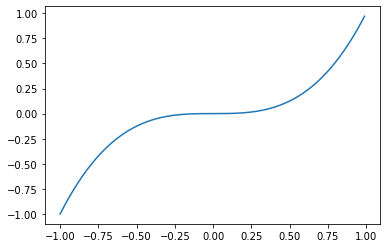

In [31]:
x = np.arange(-1., 1., 0.01)
y = x**3
plt.plot(x, y)

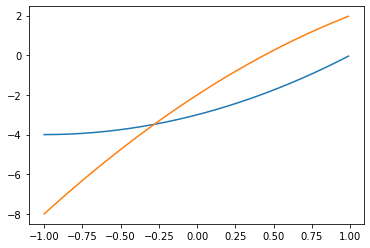

In [32]:
q = quadratic.quadratic(1., 2., -3.)
y = q.evaluate(x)
plt.plot(x, y)

q = quadratic.quadratic(-1., 5., -2.)
y = q.evaluate(x)
plt.plot(x, y)

##### Plotting 2-dimensional data

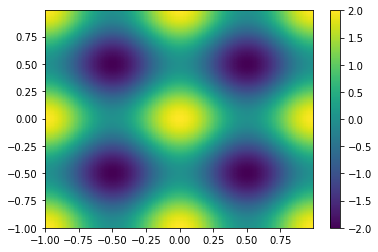

In [33]:
x = np.arange(-1., 1., 0.01)[np.newaxis, :]
y = np.arange(-1., 1., 0.01)[:, np.newaxis]

z = np.cos(2.*np.pi*x) + np.cos(2.*np.pi*y)

plt.pcolormesh(x, y, z)
plt.colorbar()

##### Customizing a plot

There are many ways to customize a plot. Some of the most common modifications to make are:
- [colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
- [labeling](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html)
- [data marker and line styling](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)
- [figure formatting](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)

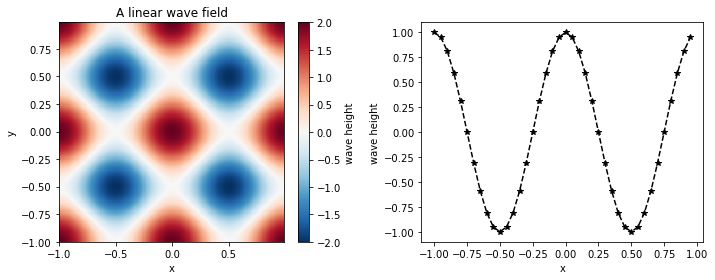

In [34]:
x = np.arange(-1., 1., 0.01)[np.newaxis, :]
y = np.arange(-1., 1., 0.01)[:, np.newaxis]

z = np.cos(2.*np.pi*x) + np.cos(2.*np.pi*y)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.pcolormesh(x, y, z, cmap=plt.get_cmap('RdBu_r'))
plt.colorbar(label='wave height')
plt.xlabel('x')
plt.ylabel('y')
plt.title('A linear wave field')

plt.subplot(1,2,2)
plt.plot(y[::5], np.cos(2.*np.pi*y)[::5], "k*--")
plt.xlabel('x')
plt.ylabel('wave height')
plt.tight_layout()
plt.savefig('figures/waves.png', dpi=200, bbox_inches='tight')

##### Exercise: use numpy functions to generate your own toy data set and plot it using matplotlib!

In [35]:
### Type your solution below



<hr>

#### [`netCDF4`](https://unidata.github.io/netcdf4-python/netCDF4/index.html): a Python interface to the [netCDF](https://www.unidata.ucar.edu/software/netcdf/) C library. (~40 minutes)


##### About `netCDF4`

The Network Common Data Form (NetCDF) is "a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data".

The adoption of this common data format starting in the 1989 facilitated the development of generic codes for writing, reading, and analyzing multi-dimensional data, where data formats previously differed across scientific institutions and each unique data format required their own dedicated software libraries. The NetCDF data format (`.nc` suffix) is a standardized way of storing N-dimensional arrays (stored as `numpy` objects in Python) and metadata (stored as `string` objects in Python) in binary.

The `netcdf4` Python module provides a metadata-aware interface between the binary data and the user's Python environment.

In [36]:
import netCDF4 as nc

The following is a list of a few example data sets for a few subfields of earth science:
 - Topographic elevation of Cold Bay Alaska: `dataset_list[0] = cold_bay_akaska_elevation.nc`
 - HadCRUT gridded near-surface air temperature data: `dataset_list[1] = HadCRUT.4.6.0.0.median.nc`
 - Global Precipitation Climatology Project (GPCP) gridded precipitation data: `dataset_list[2] = GPCP_precip.nc`


In [55]:
dataset_list = [
    "cold_bay_alaska_elevation.nc",
    "HadCRUT.4.6.0.0.median.nc",
    "GPCP_precip.nc"
]

##### Example: topographic elevation in the region surrounding Cold Bay, Alaska

In the following example of the topography of the region near Cold Bay, Alaska (the first entry in `dataset_list`), we show how to read, analyze, and plot a NetCDF dataset.

We begin by initializing a `Dataset` object from the `netCDF4` module by passing the path to the file as an argument.

In [60]:
data = nc.Dataset("data/"+dataset_list[0])

Using `print(data)`, we can look at the how all of the data and metadata is organized in the netCDF4 dataset.

In [61]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    GDAL_AREA_OR_POINT: Point
    Conventions: ACDD 1.3, CF-1.6
    GDAL: GDAL 1.11.4, released 2016/01/25
    history: Tue Jul 26 17:48:38 2016: GDAL CreateCopy( /nfs/metadata_working/DEM/coldbay_8s.nc, ... )
    title: Cold Bay, Alaska 8 arc-second Coastal Digital Elevation Model
    GMT_version: 4.5.13 [64-bit]
    node_offset: 1
    summary: NOAA's National Geophysical Data Center (NGDC) is building high-resolution digital elevation models (DEMs) to support individual coastal States as part of the National Tsunami Hazard Mitigation Program's (NTHMP) efforts to improve community preparedness and hazard mitigation. These integrated bathymetric-topographic DEMs are used to support tsunami and coastal inundation mapping. Bathymetric, topographic, and shoreline data used in DEM compilation are obtained from various sources, including NGDC, the U.S. National Ocean Service (NOS), the U.S. Geol

Near the bottom of the long print statement, the `variables(dimensions):` shows the three key variables. The dependent variable of interest, `Band1(lat, lon)` is a two-dimensional function of the variables `lat(lat)` and `lon(lon)`, which are self-describing independent variables.

The `title` attribute in the dataset gives us a short summary of the data represented in the dataset, which tells us that `Band1` is likely the elevation.

In [62]:
print(data.title)

Cold Bay, Alaska 8 arc-second Coastal Digital Elevation Model


It is not immediately obvious what `Band1` means to the non-expert, so we can print it's metadata to learn more:

In [63]:
print(data['Band1'])

<class 'netCDF4._netCDF4.Variable'>
float32 Band1(lat, lon)
    long_name: GDAL Band Number 1
    _FillValue: -99999.0
    grid_mapping: crs
    units: meters
    positive: up
unlimited dimensions: 
current shape = (1351, 1351)
filling on


The `long_name` attribute in the variable's metadata tells us that `Band1` corresponds to Band Number 1, as defined by the Geospatial Data Abstraction Library (GDAL) conventions.

Similarly, we can get some more metadata on the `lat` and `lon` variables:

In [64]:
print(data['lon'], data['lat'])

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    actual_range: [-164.50111111 -161.49888889]
unlimited dimensions: 
current shape = (1351,)
filling on, default _FillValue of 9.969209968386869e+36 used <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    actual_range: [52.99888889 56.00111111]
unlimited dimensions: 
current shape = (1351,)
filling on, default _FillValue of 9.969209968386869e+36 used


Finally, we can get a preview of the dataset's numerical values by indexing along both dimensions:

In [65]:
print(data['Band1'][:,:])

[[-4315.022    -4310.901    -4308.1685   ... -5232.706    -5216.3916
  -5210.885   ]
 [-4295.62     -4291.772    -4289.575    ... -5250.371    -5240.815
  -5233.7905  ]
 [-4256.6445   -4258.5547   -4258.311    ... -5229.3467   -5226.7207
  -5227.6055  ]
 ...
 [  -91.729645   -91.94089    -92.047386 ...   -27.725378   -27.651352
    -27.67808 ]
 [  -91.61961    -91.689865   -91.80033  ...   -29.278463   -28.086462
    -27.678217]
 [  -91.48       -91.50936    -91.62949  ...   -29.482727   -29.479567
    -29.442062]]


Using the matplotlib functions from above, we can plot a map of the topographic elevation in the region

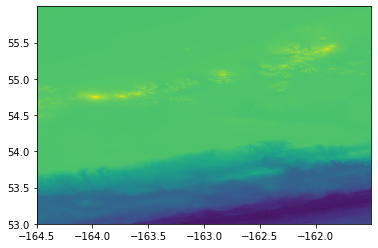

In [66]:
plt.pcolormesh(data['lon'], data['lat'], data['Band1'])

This command generates a color plot with dark blues representing low elevations and bright yellows representing high elevations, with longitude on the x-axis and latitude on the y-axis. If we want to share this plot with others however, we probably first want to add some metadata labels, such as axis labels, a labeled colorbar, and a title.

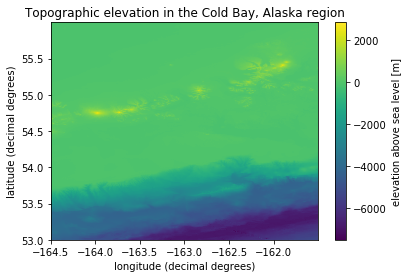

In [67]:
# Make a color map of the data
plt.pcolormesh(
    data['lon'],
    data['lat'],
    data['Band1'],
)

# Add some metadata labels
plt.xlabel('longitude (decimal degrees)')
plt.ylabel('latitude (decimal degrees)')
plt.colorbar(label='elevation above sea level [m]')
plt.title('Topographic elevation in the Cold Bay, Alaska region');

We can zoom in on the mountain range in the north-east of the region by finding the indixes in the longitude and latitude dimensions corresponding to roughly:

$-163.25^{\circ}$E $ < $ `lon` $ < -161.75^{\circ}$E

$54.5^{\circ}$N $ < $ `lat` $ < 56.75^{\circ}$N

In [68]:
lon_idx = (-163.25 < data['lon'][:]) & (data['lon'][:] < -161.75)
lat_idx = (54.5 < data['lat'][:]) & (data['lat'][:] < 56.75)

Plotting just the data for the zoomed-in region indices (note that the colorbar automatically adjusts to the maximum and minimum of our zoomed-in region):

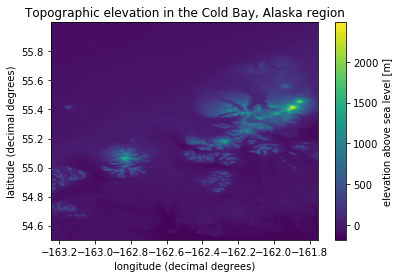

In [69]:
# Make a color map of the data
plt.pcolormesh(
    data['lon'][lon_idx],
    data['lat'][lat_idx],
    data['Band1'][lat_idx, lon_idx],
)

# Add some metadata labels
plt.xlabel('longitude (decimal degrees)')
plt.ylabel('latitude (decimal degrees)')
plt.colorbar(label='elevation above sea level [m]')
plt.title('Topographic elevation in the Cold Bay, Alaska region');

It is a little bit difficult to parse what is above and what is below sea level since anything less than a few hundred meters above sea level is dark blue, so let's add a black contour for sea level. While we're at it, let's also add some metadata labels and include a bit more information on the plot.

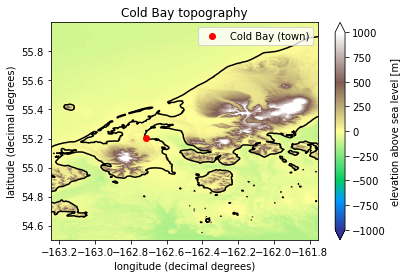

In [70]:
# Make a color map of the data
plt.pcolormesh(
    data['lon'][lon_idx],
    data['lat'][lat_idx],
    data['Band1'][lat_idx, lon_idx],
    cmap=plt.get_cmap('terrain') # change the colormap to something more terrestrial
)
plt.colorbar(extend='both', label='elevation above sea level [m]')
plt.clim([-1000, 1000])

# Contour sea level in black
plt.contour(
    data['lon'][lon_idx],
    data['lat'][lat_idx],
    data['Band1'][lat_idx, lon_idx],
    colors='k',
    levels=[0],
)

# Put a red dot at the location of the town Cold Bay
plt.plot([-162.718], [55.205], 'ro', label='Cold Bay (town)')

# Make the plot pretty
plt.legend()
plt.xlabel('longitude (decimal degrees)')
plt.ylabel('latitude (decimal degrees)')
plt.title('Cold Bay topography');

##### Exercise: Analyze a dataset of your choice

In [71]:
dataset_list

['cold_bay_alaska_elevation.nc', 'HadCRUT.4.6.0.0.median.nc', 'GPCP_precip.nc']

<hr>

### Advanced packages


#### `pandas`: an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools

##### About `pandas`

In [14]:
import pandas as pd

Just as we used `netCDF4` to read NetCDF files into a `netCDF4.Dataset` object, we now use `pandas` to read an Excel Spreadsheet or, more formally, a text file with Comma-Separated Values (CSV) into a `pandas.Dataframe` object which similarly links tabulated ata with the metadata for each column.

The following is a list of a few example data sets for a few subfields of earth science:
- Mauna Loa CO$_{2}$ concentrations: `dataset_list[0] = mauna_loa_co2.csv`
- Global Earthquake data (Magnitude > 4.5, last 30 days): `dataset_list[1] = big_earthquakes.csv`


In [17]:
dataset_list = [
    'mauna_loa_co2.csv',
    'big_earthquakes.csv'
]

##### Example: CO$_{2}$ concentrations at Mauna Loa Observatory

In [18]:
df = pd.read_csv("data/"+dataset_list[0], header = 54)

In [19]:
df.head() # displays the first four rows of data, as well as the metadata for each column.

,Yr,Mn,Date,Date,CO2,seasonally,fit,seasonally,CO2,seasonally
0,,,,,,adjusted,,adjusted fit,filled,adjusted filled
1,,,Excel,,[ppm],[ppm],[ppm],[ppm],[ppm],[ppm]
2,1958,01,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
3,1958,02,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
4,1958,03,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43


##### A common workflow glitch: data clean-up

Inexplicably, the Scripps CO2 Program makes the metadata (i.e. column names and units) in their excel spreadsheets span multiple rows, and . 

That's alright – using some basic `pandas.DataFrame` methods and list comprehension, we can easily correct this.

In [76]:
df = pd.read_csv("data/mauna_loa_co2.csv", header = 54)

# Add the first two rows to the column metadata...
df.columns = [
    " ".join((a + " " + b + " " + c).replace("\n", "").split())
    for a, b, c
    in zip(list(df.columns), list(df.iloc[0]), list(df.iloc[1]))
]
df = df.drop(df.index[0:2]) # ...and then delete them from the actual data

# We need convert the datatype back to floats since the strings of metadata
# confused pandas...
df = df.astype('float64')
df = df.mask(df == -99.99) # and mask unphysical values (turn them into "Not a Number" or NaN types)
df

,Yr,Mn,Date Excel,Date,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled [ppm]
2,1958.0,1.0,21200.0,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
3,1958.0,2.0,21231.0,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
4,1958.0,3.0,21259.0,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
5,1958.0,4.0,21290.0,1958.2877,317.45,315.16,317.29,314.98,317.45,315.16
6,1958.0,5.0,21320.0,1958.3699,317.51,314.71,317.85,315.06,317.51,314.71
...,...,...,...,...,...,...,...,...,...,...
741,2019.0,8.0,43692.0,2019.6219,410.08,411.62,410.20,411.78,410.08,411.62
742,2019.0,9.0,43723.0,2019.7068,408.55,412.06,408.48,412.00,408.55,412.06
743,2019.0,10.0,43753.0,2019.7890,408.43,412.07,408.60,412.22,408.43,412.07
744,2019.0,11.0,43784.0,2019.8740,410.28,412.56,410.20,412.45,410.28,412.56


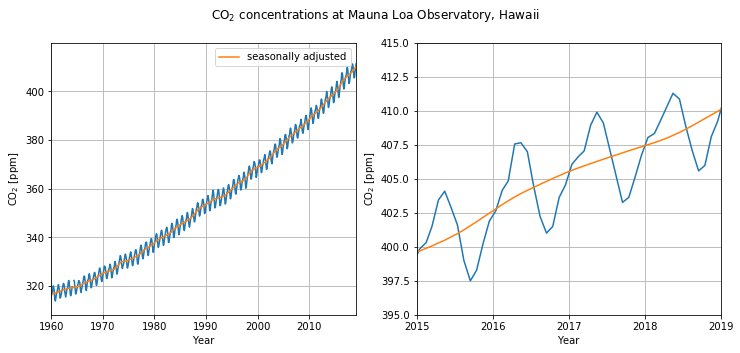

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(df['Date'], df['CO2 [ppm]'])
plt.plot(df['Date'], df['seasonally adjusted fit [ppm]'], label='seasonally adjusted')
plt.xlim([1960., 2019.])
plt.xlabel("Year")
plt.ylabel(r"CO$_{2}$ [ppm]")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(df['Date'], df['CO2 [ppm]'])
plt.plot(df['Date'], df['seasonally adjusted fit [ppm]'])
plt.xlim([2015., 2019.])
plt.ylim([395.,415.])
plt.xlabel("Year")
plt.ylabel(r"CO$_{2}$ [ppm]")
plt.xticks(np.arange(2015., 2020.), np.arange(2015, 2020));
plt.grid(True)
plt.suptitle(r"CO$_{2}$ concentrations at Mauna Loa Observatory, Hawaii");

##### Exercise: analyze a dataset of your chocie

In [78]:
dataset_list

['mauna_loa_co2.csv', 'big_earthquakes.csv']

#### `cartopy`:

##### About `cartopy`

In [20]:
import cartopy

##### Example: plotting recent Earthquake data on a map of the globe

In [23]:
df = pd.read_csv("data/"+dataset_list[1])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-13T02:01:40.627Z,-40.2568,-71.1867,162.88,5.3,mww,NaN,34.0,1.087,1.14,...,2020-01-13T02:32:33.040Z,"17km SE of San Martin de los Andes, Argentina",earthquake,6.7,4.5,0.060,27.0,reviewed,us,us
1,2020-01-12T21:42:36.962Z,-1.7290,-91.5054,10.00,4.6,mb,NaN,282.0,1.607,0.81,...,2020-01-12T22:27:29.040Z,"104km SW of Puerto Villamil, Ecuador",earthquake,9.1,2.0,0.044,150.0,reviewed,us,us
2,2020-01-12T19:06:33.550Z,-7.1204,155.4850,78.00,4.6,mb,NaN,190.0,4.403,0.80,...,2020-01-12T20:01:27.040Z,"88km S of Panguna, Papua New Guinea",earthquake,15.0,10.2,0.101,29.0,reviewed,us,us
3,2020-01-12T16:48:05.362Z,-7.3577,155.8617,35.00,5.2,mb,NaN,86.0,4.840,0.74,...,2020-01-12T17:38:22.040Z,"110km SW of Chirovanga, Solomon Islands",earthquake,9.5,2.0,0.051,126.0,reviewed,us,us
4,2020-01-12T16:44:33.649Z,-22.6378,-177.3702,332.52,4.8,mb,NaN,163.0,6.493,0.67,...,2020-01-12T17:28:20.040Z,"259km SSE of Ndoi Island, Fiji",earthquake,13.7,9.4,0.093,36.0,reviewed,us,us


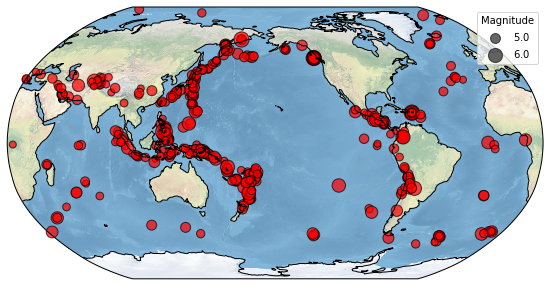

In [94]:
proj = cartopy.crs.Robinson(central_longitude=200.)
geo = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.set_global()

ax.stock_img()
ax.coastlines()

scatter = ax.scatter(df['longitude'], df['latitude'], s=(df['mag']-4.)*100.,
                     alpha=0.7, edgecolor='k', marker='o', color='r',
                     transform=geo)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(num=[100., 200.], prop="sizes", alpha=0.6)
labels = [
    f'$\\mathdefault{{{100/100.+4.}}}$',
    f'$\\mathdefault{{{200/100.+4.}}}$'
]
legend2 = ax.legend(handles, labels, loc="upper right", title="Magnitude")

In [74]:
labels[0].split('{')

['$\\mathdefault', '60}$']

In [87]:
labels

['$\\mathdefault{100}$', '$\\mathdefault{200}$']

#### `xarray`

##### About xarray

In [380]:
import xarray as xr

##### Example: revisiting the `netCDF4` example of topographic elevation in the region surrounding Cold Bay, Alaska

In [381]:
ds = xr.open_dataset(dataset_list[0])
ds

<xarray.Dataset>
Dimensions:  (lat: 1351, lon: 1351)
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:              Point
    Conventions:                     ACDD 1.3, CF-1.6
    GDAL:                            GDAL 1.11.4, released 2016/01/25
    history:                         Tue Jul 26 17:48:38 2016: GDAL CreateCop...
    title:                           Cold Bay, Alaska 8 arc-second Coastal Di...
    GMT_version:                     4.5.13 [64-bit]
    node_offset:                     1
    summary:                         NOAA's National Geophysical Data Center ...
    keywords:                        Earth Science > Oceans > Bathymetry/Seaf...
    time_coverage_start:             1901-01-01
    time_coverage_end:               2012-01-01
    id:                              4955
    naming_authority:                gov.noaa.ngdc.mgg.dem
    source:                          NOS Hydrographic Surveys; Bench Mark Dat...
    comment:                         Developed for the University of Alaska a...
    license:                         Not to be used for navigation. Although ...
    creator_name:                    DOC/NOAA/NESDIS/NCEI > National Centers ...
    creator_email:                   dem.info@noaa.gov
    creator_url:                     http://www.ngdc.noaa.gov/mgg/dem
    project:                         ICSU-WDS > International Council for Sci...
    geospatial_bounds_crs:           World Geodetic System 1984
    geospatial_bounds_vertical_crs:  Mean Higher High Water height
    publisher_name:                  NOAA National Center for Environmental I...
    publisher_email:                 dem.info@noaa.gov
    publisher_url:                   http://www.ngdc.noaa.gov/mgg/dem
    geospatial_lat_min:              53.00
    geospatial_lat_max:              56.00
    geospatial_lon_min:              -164.50
    geospatial_lon_max:              -161.50
    cdm_data_type:                   Grid
    date_issued:                     2014-01-02; publication
    date_metadata_modified:          2016-07-28
    product_version:                 1
    keywords_vocabulary:             CF Standard Name Table v27
    references:                      Digital Elevation Models of Cold Bay and...
    creator_type:                    group or institution
    creator_institution:             DOC/NOAA/NESDIS/NCEI > National Centers ...
    publisher_type:                  institution
    geospatial_lat_units:            decimal degrees
    geospatial_lon_units:            decimal degrees
    geospatial_lon_resolution:       0.0022222222
    geospatial_lat_resolution:       0.0022222222
    geospatial_vertical_resolution:  0.0022222222

`xarray.Dataset` objects are fully meta-data aware – much more so than the `netCDF4.Dataset` objects above.

Variables like `lat` and `lon` which describe dimensions are represented as `Coordinates`.

In [382]:
ds.coords

Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5

Data variables such as `Band1` are `xarray.DataArray` objects, which links an N-dimensional arrays of a variable's values with it's coordinates and various attributes (e.g. units).

In [383]:
ds['Band1']

<xarray.DataArray 'Band1' (lat: 1351, lon: 1351)>
[1825201 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 53.0 53.0 53.0 53.01 53.01 ... 55.99 56.0 56.0 56.0
  * lon      (lon) float64 -164.5 -164.5 -164.5 -164.5 ... -161.5 -161.5 -161.5
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs
    units:         meters
    positive:      up

Underlying all of the metadata infrastructure is `numpy.Array` containing the variable's values:

In [384]:
ds['Band1'].values

array([[-4315.022   , -4310.901   , -4308.1685  , ..., -5232.706   ,
        -5216.3916  , -5210.885   ],
       [-4295.62    , -4291.772   , -4289.575   , ..., -5250.371   ,
        -5240.815   , -5233.7905  ],
       [-4256.6445  , -4258.5547  , -4258.311   , ..., -5229.3467  ,
        -5226.7207  , -5227.6055  ],
       ...,
       [  -91.729645,   -91.94089 ,   -92.047386, ...,   -27.725378,
          -27.651352,   -27.67808 ],
       [  -91.61961 ,   -91.689865,   -91.80033 , ...,   -29.278463,
          -28.086462,   -27.678217],
       [  -91.48    ,   -91.50936 ,   -91.62949 , ...,   -29.482727,
          -29.479567,   -29.442062]], dtype=float32)

Because `xarray.DataArray` objects are meta-data aware, they include useful Python `methods` such as the `xarray.DataAraray.plot()` method, which automatically knows how to label axes and colorbars (including units!)

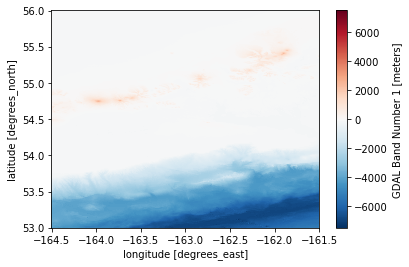

In [385]:
ds['Band1'].plot()

The which picks one of the follow plot types depending on the number of dimensions:
- `matplotlib.pyplot.plot()` line plots for 1-dimensional data
- `matplotlib.pyplot.pcolormesh()` colormaps for 2-dimensional data
- `matplotlib.pyplot.hist()` plots a histogram of values for data with more than 2 dimensions

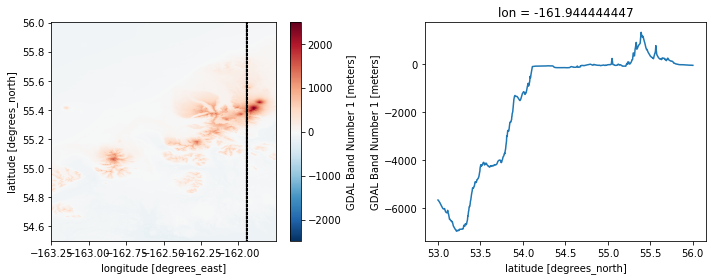

In [386]:
lon_index = 1150

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ds['Band1'].sel(lon=slice(-163.25, -161.75), lat=ds['lat'][lat_idx]).plot()
plt.plot(
    ds['lon'].isel(lon=lon_index).values * np.ones_like(ds['Band1'].isel(lon=lon_index)),
    ds['Band1'].isel(lon=lon_index),
    "k:"
)

plt.subplot(1,2,2)
ds['Band1'].isel(lon=lon_index).plot()

plt.tight_layout()